## Cancer Death Rate Prediction
### Agenda
- Problem Statement
    - Objective
    - Dataset & Data Description
    
- Solution Steps:
    - Task 1
        - Import Libraries
        - Load data
        - Understand your data: Data Analysis and Visualizations (EDA)
        - Separate input and target features of the data
        - Prepare train and test datasets
    - Task 2
        - Pre-process data
    - Task 3 
        - Choose any regression algorithm and build model
        - Train & Evaluate model 
        - Try with different machine learning models and evaluate them
    - Task 4
        - Hyperparameter tuning for the best model obtained from task 3
        - Optimize it with the best parameters
    - Task 5
        - Feature Selection
        - Train and Evaluate the model with the selected features/
        
    - Load the new test data
    - Fill missing values if any
    - Preprocessing and cleaning the data
    - Predict the target values
- Conclusion


## Problem Statement
### Objective
Many aspects of the behaviour of cancer disease are highly unpredictable. Even with the huge number of studies that have been done on the DNA mutation responsible for the disease, we are still unable to use these information at clinical level. 

However, it is important that we understand the effects and impacts of this disease from the past information as much as we possibly can. Now, You are required to build a machine learning  model that would predict the cancer death rate for the given year.

### Dataset & Data Description
This dataset contains the data collected from cancer.gov and the US Census American Community Survey. 

To load the training data in your jupyter notebook, use the below command:

    import pandas as pd
    cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )
    
#### Dataset Description: There are 34 columns including the target column
- TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)
- avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)
- avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)
- incidenceRate: Mean per capita (100,000) cancer diagoses(a)
- medianIncome: Median income per county (b)
- popEst2015: Population of county (b)
- povertyPercent: Percent of populace in poverty (b)
- studyPerCap: Per capita number of cancer-related clinical trials per county (a)
- binnedInc: Median income per capita binned by decile (b)
- MedianAge: Median age of county residents (b)
- MedianAgeMale: Median age of male county residents (b)
- MedianAgeFemale: Median age of female county residents (b)
- Geography: County name (b)
- AvgHouseholdSize: Mean household size of county (b)
- PercentMarried: Percent of county residents who are married (b)
- PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)
- PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)
- PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)
- PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)
- PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)
- PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)
- PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)
- PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)
- PctPrivateCoverage: Percent of county residents with private health coverage (b)
- PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)
- PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)
- PctPublicCoverage: Percent of county residents with government-provided health coverage (b)
- PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)
- PctWhite: Percent of county residents who identify as White (b)
- PctBlack: Percent of county residents who identify as Black (b)
- PctAsian: Percent of county residents who identify as Asian (b)
- PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)
- PctMarriedHouseholds: Percent of married households (b)
- BirthRate: Number of live births relative to number of women in county (b)
    - (a): years 2010-2016
    - (b): 2013 Census Estimates



## Task 1
### Import Libraries





In [1]:
import numpy as np         # package for numerical computations
import pandas as pd        # package for data analysis and management

# libraries for data visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# for preprocessing, ML models and evaluation
from sklearn.preprocessing import StandardScaler           # for standardizing the data
from sklearn.model_selection import train_test_split       # to split the data into train and test data set
from sklearn.feature_selection import SelectFromModel      # to select the best features from the model

from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error #evaluation metrics for regression model

from sklearn.tree import DecisionTreeRegressor             # decision tree regression model
from sklearn.linear_model import LinearRegression          #linear regression model
from sklearn.ensemble import RandomForestRegressor         # random forest regression model
import xgboost as xgb                                      #xgboost model
from xgboost import plot_importance                        # to plot the feature importance plot from xgboost model

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV # to select the best params for the model

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the data and displaying the first 5 rows

In [2]:
cancer_train_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )
cancer_test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')

In [3]:
pd.set_option('display.max_columns',45) 
#to display the top 5 rows
cancer_train_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


In [4]:
cancer_test_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,"(34218.1, 37413.8]",28.8,27.4,30.1,"Hidalgo County, Texas",3.62,51.0,22.3,29.0,NaN,5.1,23.2,11.9,52.2,9.9,32.6,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,"(34218.1, 37413.8]",41.5,40.9,42.1,"Barbour County, West Virginia",2.68,52.0,9.8,36.1,45.8,8.3,47.1,7.9,46.5,9.0,55.6,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,"(61494.5, 125635]",35.0,34.2,36.0,"Stark County, North Dakota",2.44,55.8,13.0,26.8,NaN,10.0,30.5,17.5,71.4,2.8,83.3,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,"(45201, 48021.6]",44.7,44.2,45.5,"Phillips County, Kansas",2.29,60.5,33.2,13.9,45.3,7.6,35.3,15.5,63.1,4.3,75.8,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,"(51046.4, 54545.6]",535.2,44.7,44.4,"Lane County, Kansas",2.07,55.9,25.2,31.1,NaN,3.0,29.7,15.5,67.9,2.4,78.2,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


### Performing Exploratory Data Analysis (EDA)

In [5]:
cancer_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

- There are 34 columns including the target variable. 
- There are null values in the three columns (PctSomeCol18_24, PctEmployed16_Over, PctPrivateCoverageAlone).
- There are two columns of type Object (Geography,binnedInc)  and rest columns of type int64 or float64.

In [6]:
cancer_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              762 non-null    float64
 1   avgDeathsPerYear         762 non-null    int64  
 2   incidenceRate            762 non-null    float64
 3   medIncome                762 non-null    int64  
 4   popEst2015               762 non-null    int64  
 5   povertyPercent           762 non-null    float64
 6   studyPerCap              762 non-null    float64
 7   binnedInc                762 non-null    object 
 8   MedianAge                762 non-null    float64
 9   MedianAgeMale            762 non-null    float64
 10  MedianAgeFemale          762 non-null    float64
 11  Geography                762 non-null    object 
 12  AvgHouseholdSize         762 non-null    float64
 13  PercentMarried           762 non-null    float64
 14  PctNoHS18_24             7

In [7]:
# descriptive statistics
cancer_train_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,785.000000,3051.000000,3051.000000,3051.000000,2899.000000,3051.000000,3051.000000,2447.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,570.668154,176.000983,449.007042,46902.917076,9.495799e+04,16.880367,158.695936,44.303540,39.600885,42.234579,2.473048,51.885480,18.225139,34.920190,41.247898,6.131957,34.909440,13.212750,54.115626,7.841069,64.519338,48.573314,41.342347,36.287545,19.198820,84.005243,9.166570,1.198561,1.864829,51.355837,5.608851,178.909767
std,1250.546532,445.042777,52.886386,11902.460659,2.761007e+05,6.340462,544.035590,38.704107,5.177629,5.253474,0.429926,6.812846,8.105799,9.021475,11.107006,4.552222,7.015728,5.360342,8.267656,3.454863,10.511932,10.011218,9.327793,7.748442,6.023164,16.126982,14.676772,2.369931,3.235204,6.524964,1.955201,27.570075
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,25.100000,0.000000,0.000000,7.100000,0.000000,7.500000,3.200000,17.600000,0.400000,23.400000,16.800000,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,80.000000,29.000000,421.800000,38752.000000,1.236850e+04,12.200000,0.000000,37.900000,36.400000,39.200000,2.370000,47.800000,12.800000,29.300000,34.000000,3.100000,30.650000,9.300000,48.600000,5.500000,57.500000,41.300000,34.700000,31.000000,14.900000,78.012571,0.616576,0.261748,0.282825,47.736828,4.499936,161.400000
50%,171.000000,62.000000,453.549422,45098.000000,2.677700e+04,15.900000,0.000000,41.000000,39.500000,42.400000,2.500000,52.500000,17.200000,34.700000,41.000000,5.300000,35.400000,12.300000,54.400000,7.600000,65.300000,48.700000,41.300000,36.300000,18.800000,90.318790,2.276756,0.557031,0.791571,51.757925,5.384471,178.300000
75%,508.000000,148.000000,481.300000,52410.500000,6.853600e+04,20.400000,86.581336,43.900000,42.500000,45.300000,2.630000,56.500000,22.600000,40.700000,46.900000,8.100000,39.700000,16.100000,60.300000,9.700000,72.200000,55.700000,47.700000,41.400000,23.000000,95.577396,10.326954,1.189955,2.080241,55.465803,6.473896,195.500000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,3.930000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,40.400000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000


In [8]:
cancer_test_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,762.000000,762.000000,762.000000,762.000000,7.620000e+02,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,182.000000,762.000000,762.000000,762.000000,729.000000,762.000000,762.000000,614.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,711.605491,220.711286,447.204162,47029.500000,1.282696e+05,16.980315,147.999759,47.133858,39.620997,42.022178,2.500591,51.539108,18.150394,35.191207,40.574176,6.231102,34.533333,13.391207,54.027435,7.967585,63.701050,47.805700,40.608661,36.477428,19.569554,82.788278,8.896343,1.340419,2.254919,50.926053,5.736898
std,1940.045693,695.011673,56.745238,11986.997138,4.792013e+05,6.536684,480.782424,56.374276,5.469577,5.491687,0.403520,7.181519,7.939906,9.011131,11.438374,4.225098,7.113428,5.503342,8.535290,3.534852,11.037942,10.386014,9.816577,8.237832,6.459500,17.320289,14.432993,2.972052,4.090086,6.800150,2.065069
min,7.000000,3.000000,201.300000,24707.000000,1.337000e+03,4.000000,0.000000,23.300000,22.800000,22.800000,0.024000,23.100000,1.500000,7.100000,10.100000,0.000000,11.500000,2.500000,23.900000,0.700000,22.300000,15.700000,13.500000,11.200000,5.700000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,68.000000,26.000000,417.375000,38730.500000,1.075350e+04,12.300000,0.000000,37.500000,36.225000,38.900000,2.370000,47.700000,12.700000,29.125000,33.700000,3.225000,29.625000,9.500000,48.100000,5.800000,56.300000,39.950000,33.525000,30.800000,14.925000,76.468705,0.613335,0.236915,0.297753,47.607275,4.608878
50%,162.500000,60.000000,453.549422,45238.500000,2.611850e+04,15.800000,0.000000,41.100000,39.800000,42.350000,2.500000,52.250000,17.100000,35.000000,39.300000,5.500000,34.950000,12.300000,54.600000,7.500000,64.300000,48.250000,40.600000,36.600000,18.950000,89.464327,2.120925,0.538765,0.846727,51.336903,5.367187
75%,535.750000,151.000000,479.875000,52310.500000,7.086150e+04,20.400000,80.313645,44.275000,42.875000,45.500000,2.640000,56.100000,22.975000,40.575000,45.475000,8.375000,39.500000,16.100000,60.100000,9.900000,71.800000,55.500000,47.275000,42.175000,23.775000,95.162772,10.811476,1.325862,2.382843,55.208111,6.583930
max,38150.000000,14010.000000,1014.200000,103876.000000,1.017029e+07,47.400000,6810.442679,624.000000,58.600000,58.000000,3.970000,72.300000,59.100000,66.200000,78.300000,32.600000,50.200000,42.200000,80.100000,25.400000,87.900000,76.300000,68.800000,62.200000,43.300000,99.693045,85.947799,42.619425,41.930251,78.075397,18.556701


In [9]:
#checking whether the data contains any duplicate records
dup_data = cancer_train_data[cancer_train_data.duplicated()] 

In [10]:
dup_data.shape

(766, 34)

In [11]:
#dropping the duplicates from train dataset
cancer_train_data.drop_duplicates(inplace=True)

In [12]:
cancer_train_data.shape

(2285, 34)

In [13]:
#dropping this column as it has more null values
cancer_train_data.drop(columns=['PctSomeCol18_24'],axis=1,inplace=True)
cancer_test_data.drop(columns=['PctSomeCol18_24'],axis=1,inplace=True)

In [14]:
#checking the value counts of two categorical columns
for i in cancer_train_data.select_dtypes(include=object):
    print(cancer_train_data[i].value_counts(ascending=False))
    print("-------------------------------------------------------------------------------")

(54545.6, 61494.5]    240
(37413.8, 40362.7]    236
(51046.4, 54545.6]    235
(42724.4, 45201]      233
[22640, 34218.1]      227
(40362.7, 42724.4]    225
(45201, 48021.6]      224
(48021.6, 51046.4]    224
(34218.1, 37413.8]    223
(61494.5, 125635]     218
Name: binnedInc, dtype: int64
-------------------------------------------------------------------------------
Callaway County, Missouri         1
St. Francis County, Arkansas      1
Fleming County, Kentucky          1
Manatee County, Florida           1
Lenoir County, North Carolina     1
                                 ..
Worth County, Georgia             1
Stone County, Mississippi         1
Santa Clara County, California    1
Screven County, Georgia           1
Geneva County, Alabama            1
Name: Geography, Length: 2285, dtype: int64
-------------------------------------------------------------------------------


In [15]:
#dropping Geography column as it as more only one count in each unique value
#dropping the binnedInc column as we already have Medianincome of a country column
cancer_train_data.drop(columns=['binnedInc', 'Geography'],axis=1,inplace=True)
cancer_test_data.drop(columns=['binnedInc', 'Geography'],axis=1,inplace=True)

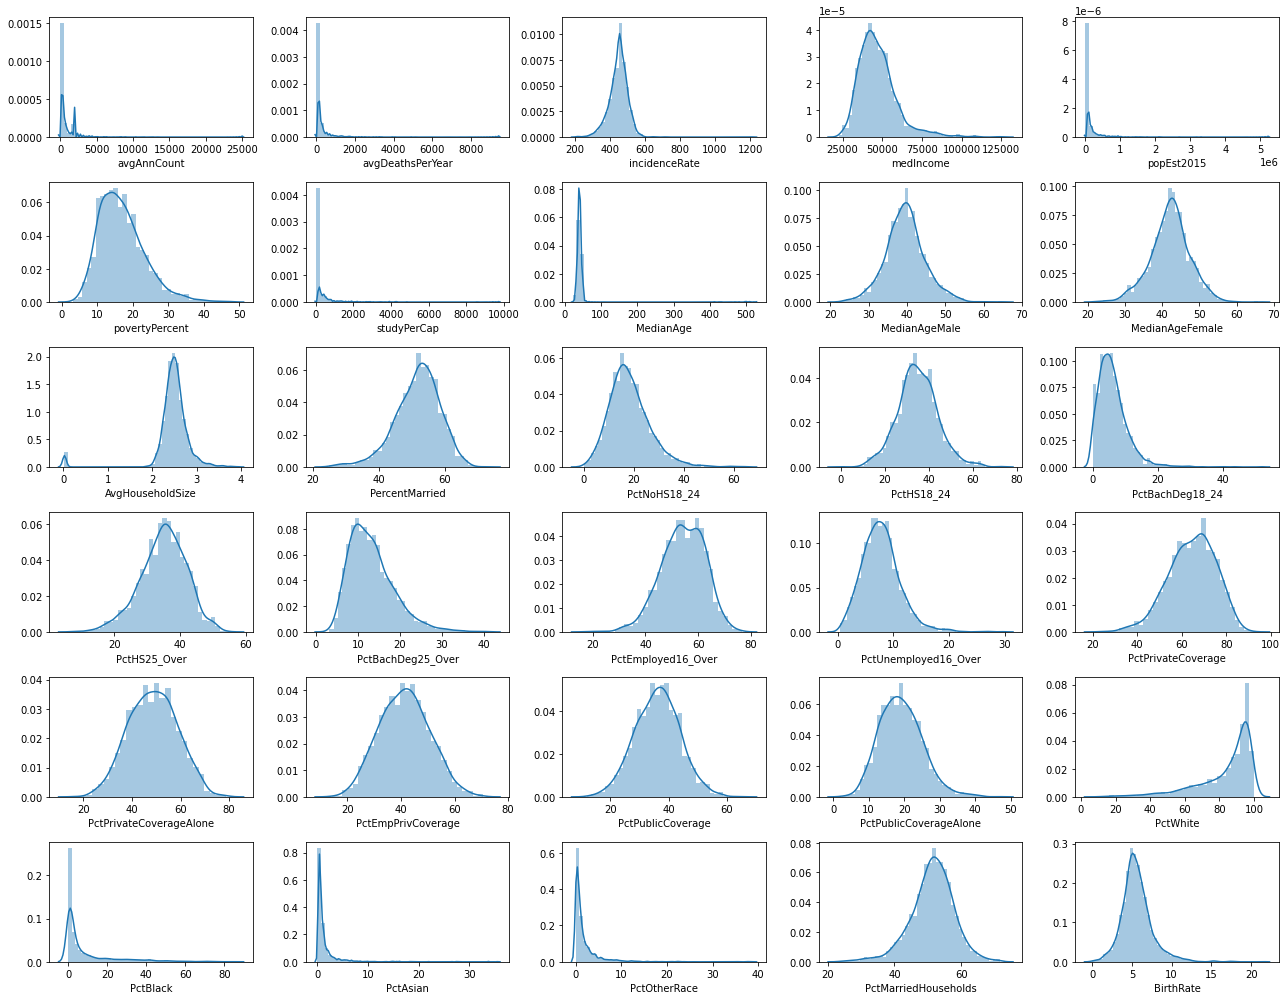

In [16]:
fig, axes = plt.subplots(6, 5, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(cancer_train_data.columns[:-1]):
  plot = sns.distplot(cancer_train_data[c] ,ax=axes[i])
plt.tight_layout()

- Most of the features follow the normal distribution
- PctWhite feature is left skewed
- PctBlack, PctAsian, PctOtherRace, AvgAnnount, avgDeathsPerYear, popEst2015, studyPerCap, MedianAge features are right skewed

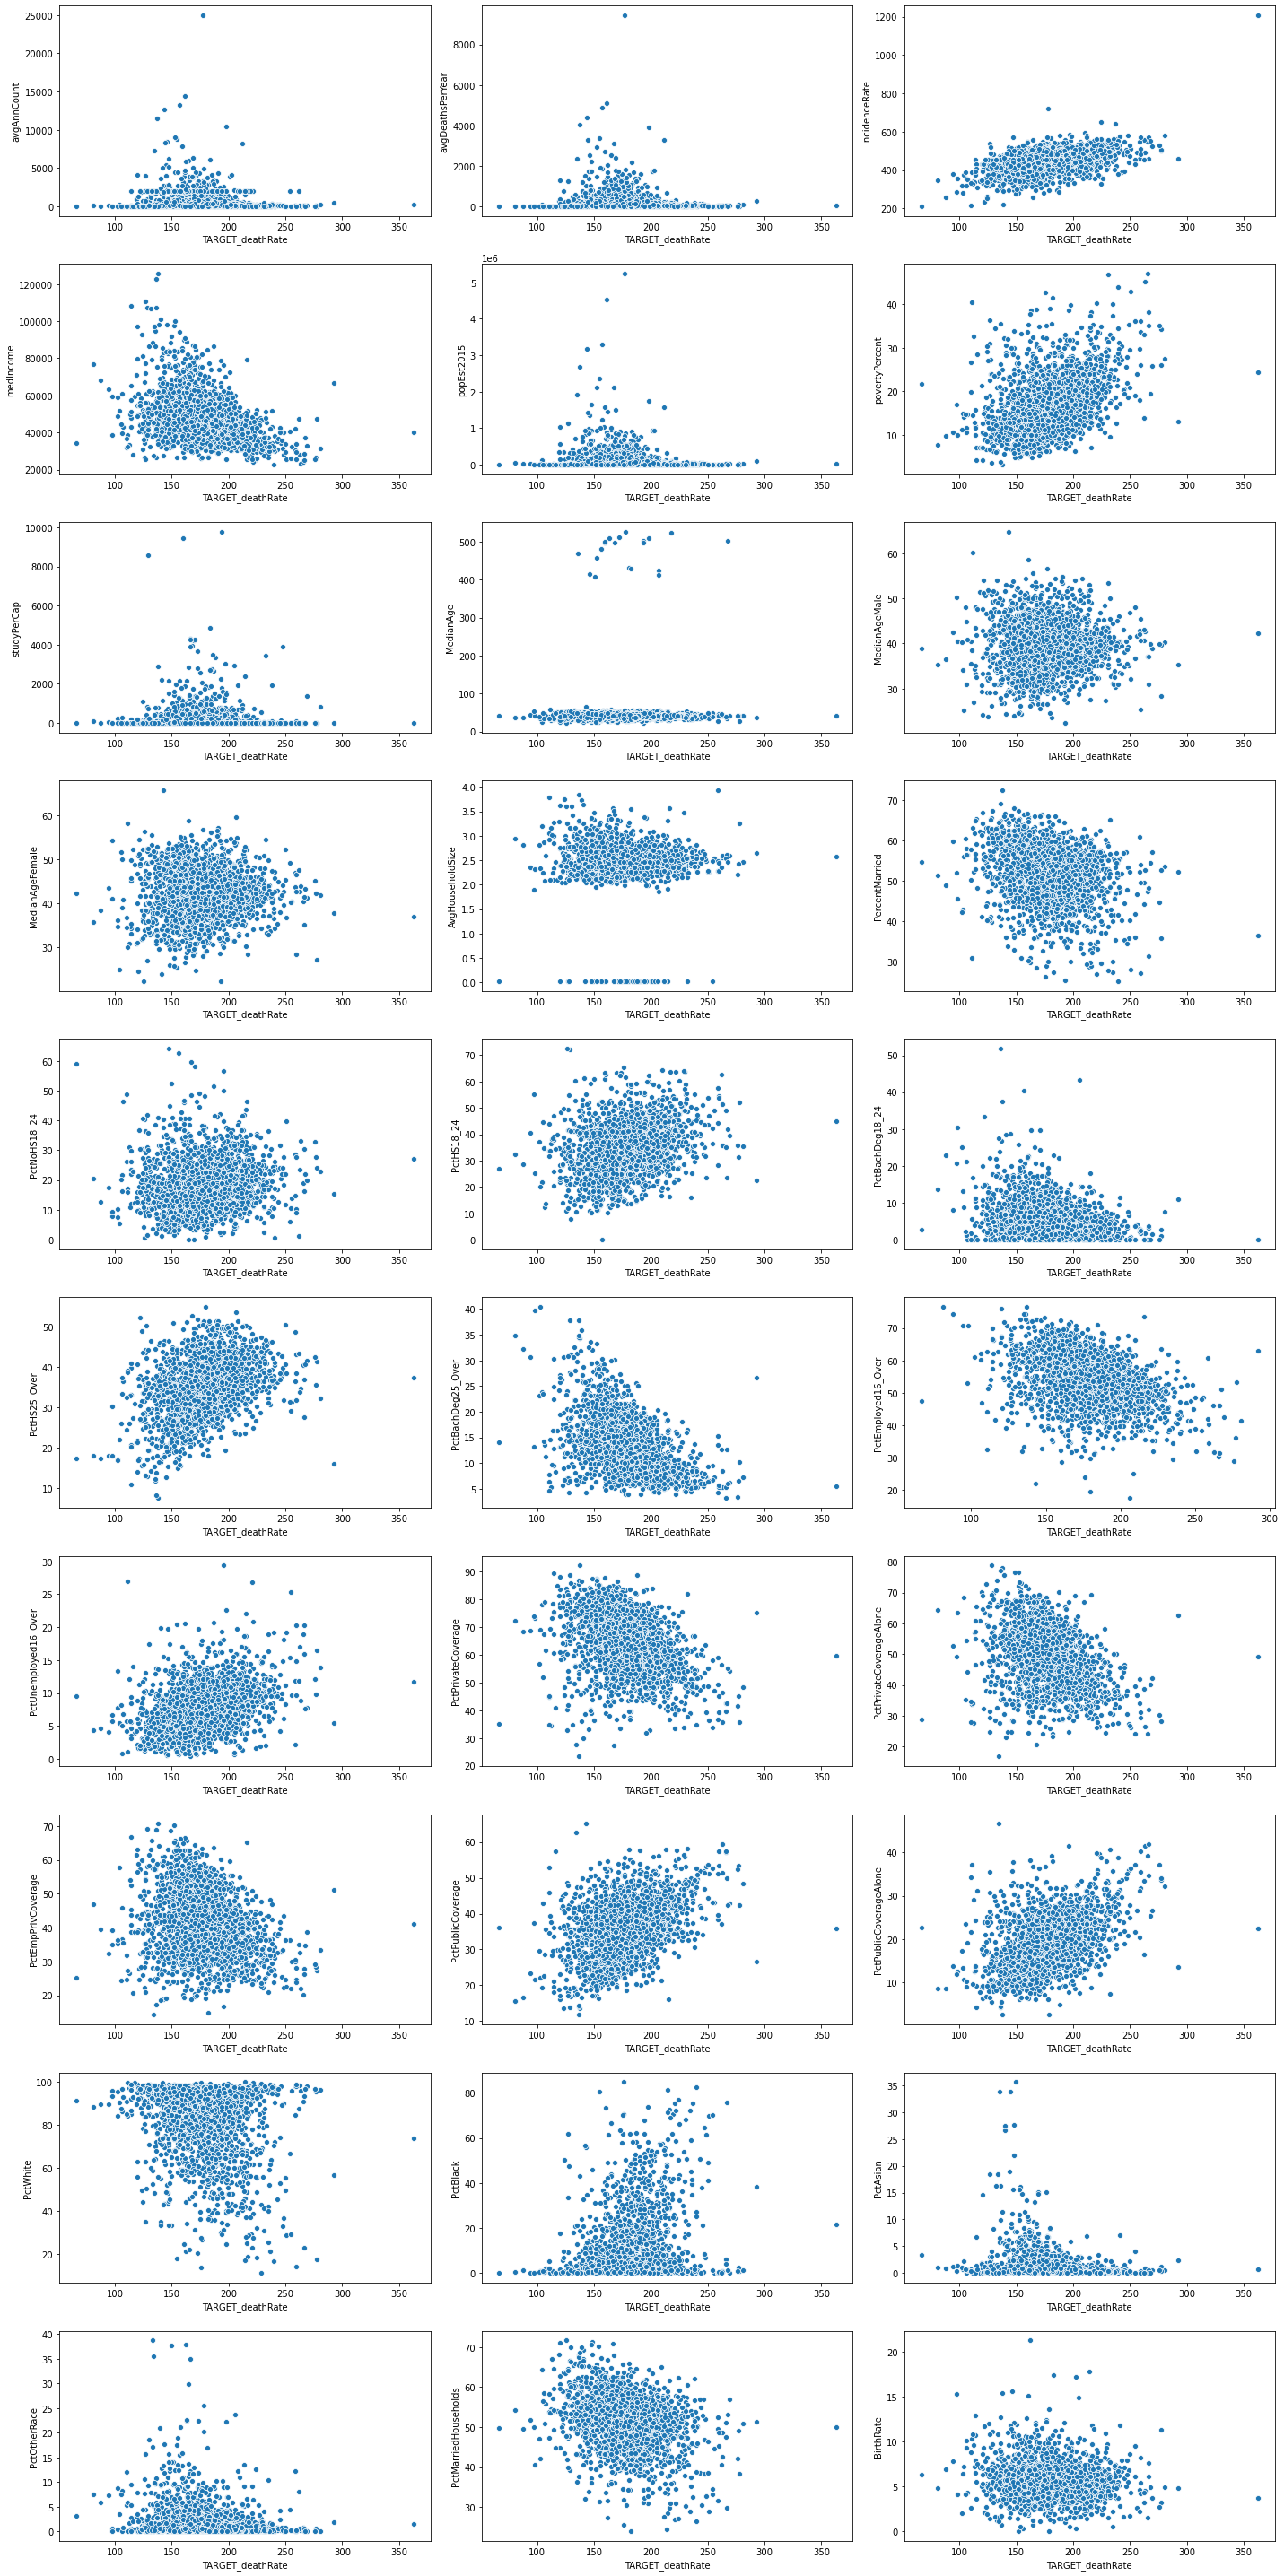

In [17]:
fig, axes = plt.subplots(10, 3, figsize=(20, 40))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(cancer_train_data.columns[:-1]):
  plot = sns.scatterplot(x="TARGET_deathRate",y=c,data=cancer_train_data,ax=axes[i])
plt.tight_layout()

- We can clearly see some of the inferences from these scatterplot
    - incident rate, povertyPercent, PctHS25_over, PctHS18_24, PctUnemployed16_Over, PctPublicCoverage, PctPublicCoverageAlone are positively correlated with the target variable
    - medianIncome, PercentMarried, PctEmpPrivCoverage,PctPrivateCoverage, PctPrivateCoverageAlone, PctBatchDeg25_Over,
      PctEmplyed16_Over, pctMarriedHousehold are negatively correlated with the target variable
    - Seems like avgAnnCount, avgDeathPerYear, IncidentRate, MedianAge,studyPerCap are having outliers with respect to the target variable

In [18]:
# sns.pairplot(cancer_train_data);

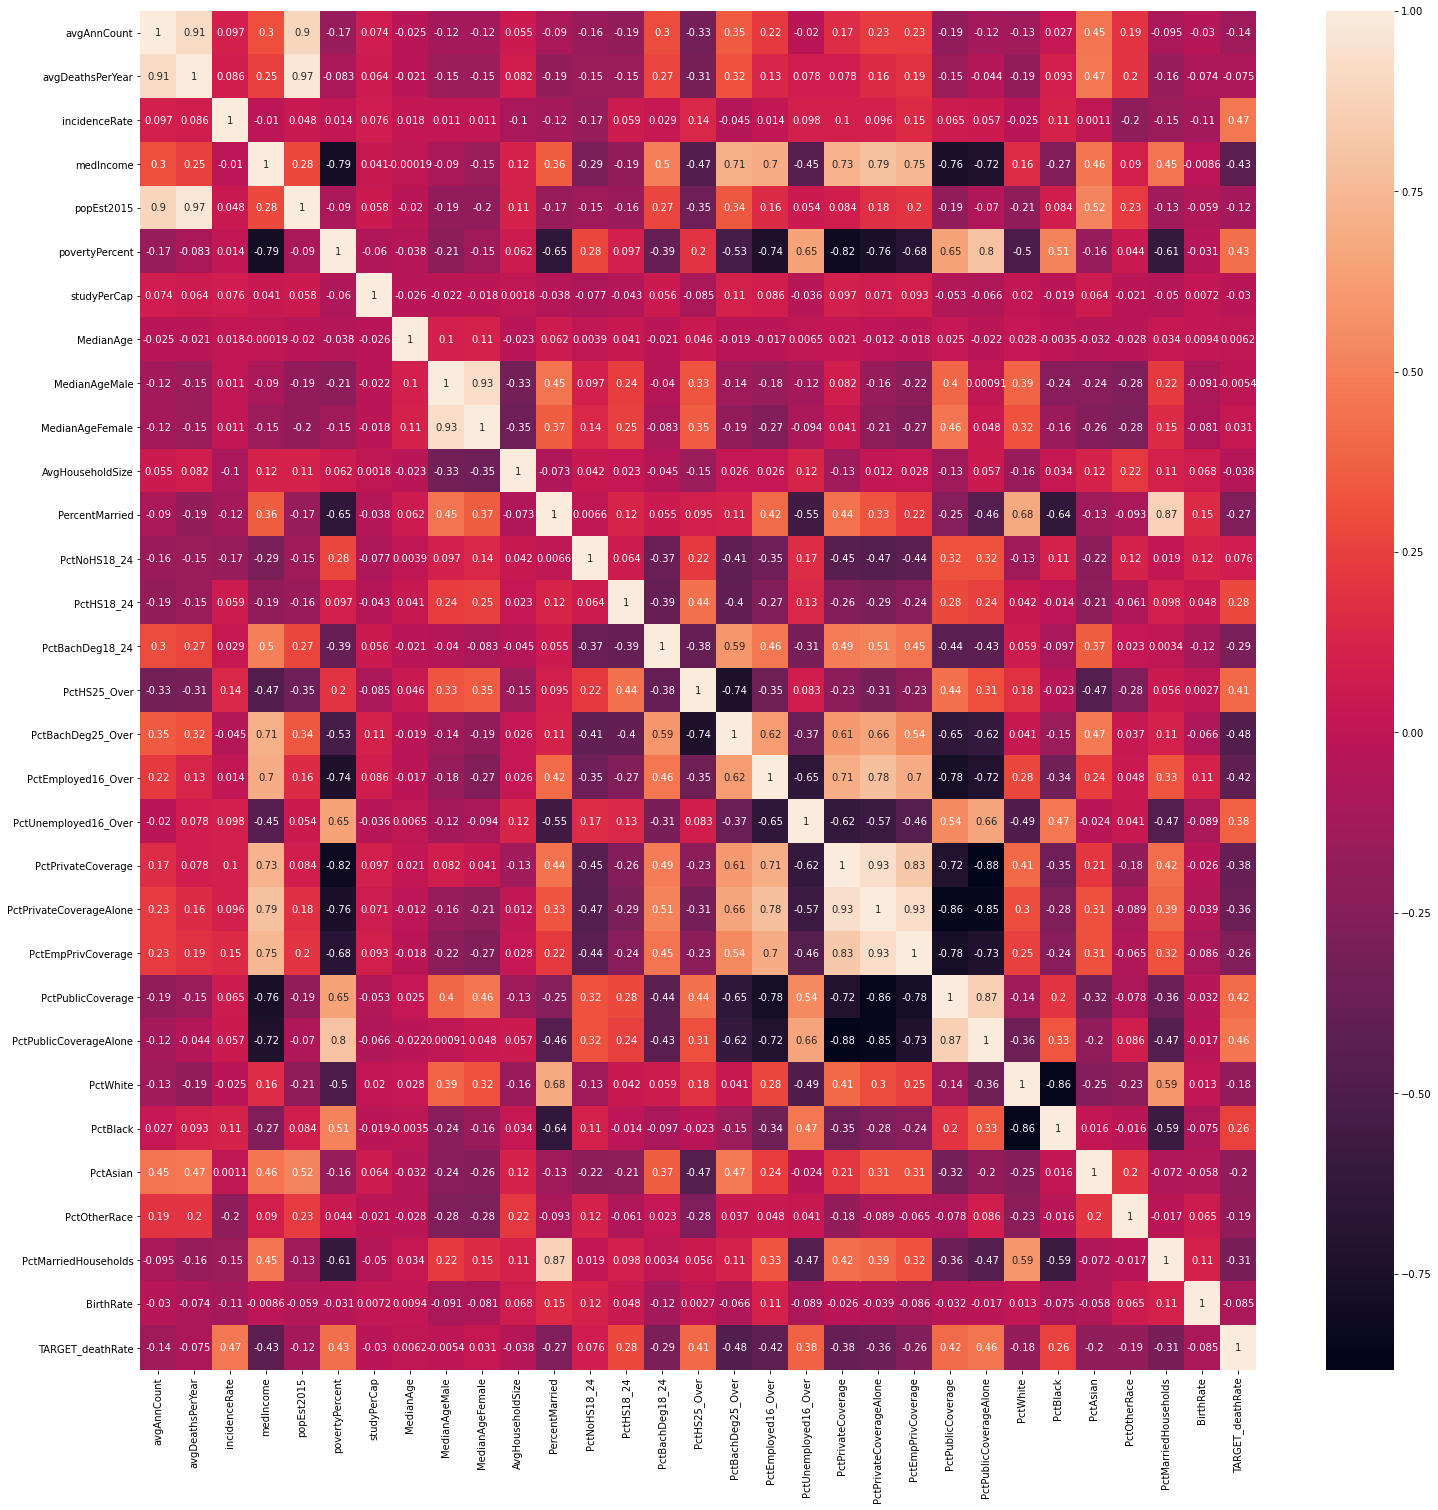

In [19]:
f,ax=plt.subplots(figsize=(25,25));
sns.heatmap(cancer_train_data.corr(),annot=True);

- As we inferred from the scatter plots, this heatmap shows that:
    - incident rate, povertyPercent, PctHS25_over, PctHS18_24, PctUnemployed16_Over, PctPublicCoverage, PctPublicCoverageAlone, are highly positively correlated with the target variable
    - Added to that, PctBlack is also positively correlated with the target variable
    - medianIncome, PercentMarried, PctBatchDeg25_Over,PctEmpPrivCoverage, PctPrivateCoverage, PctPrivateCoverageAlone, PctEmplyed16_Over, pctMarriedHousehold are negatively correlated with the target variable
    - Added to that PctBatchDeg18_24,PctWhite, PctAsian, PctOtherRace are also negatively correlated with the target variable

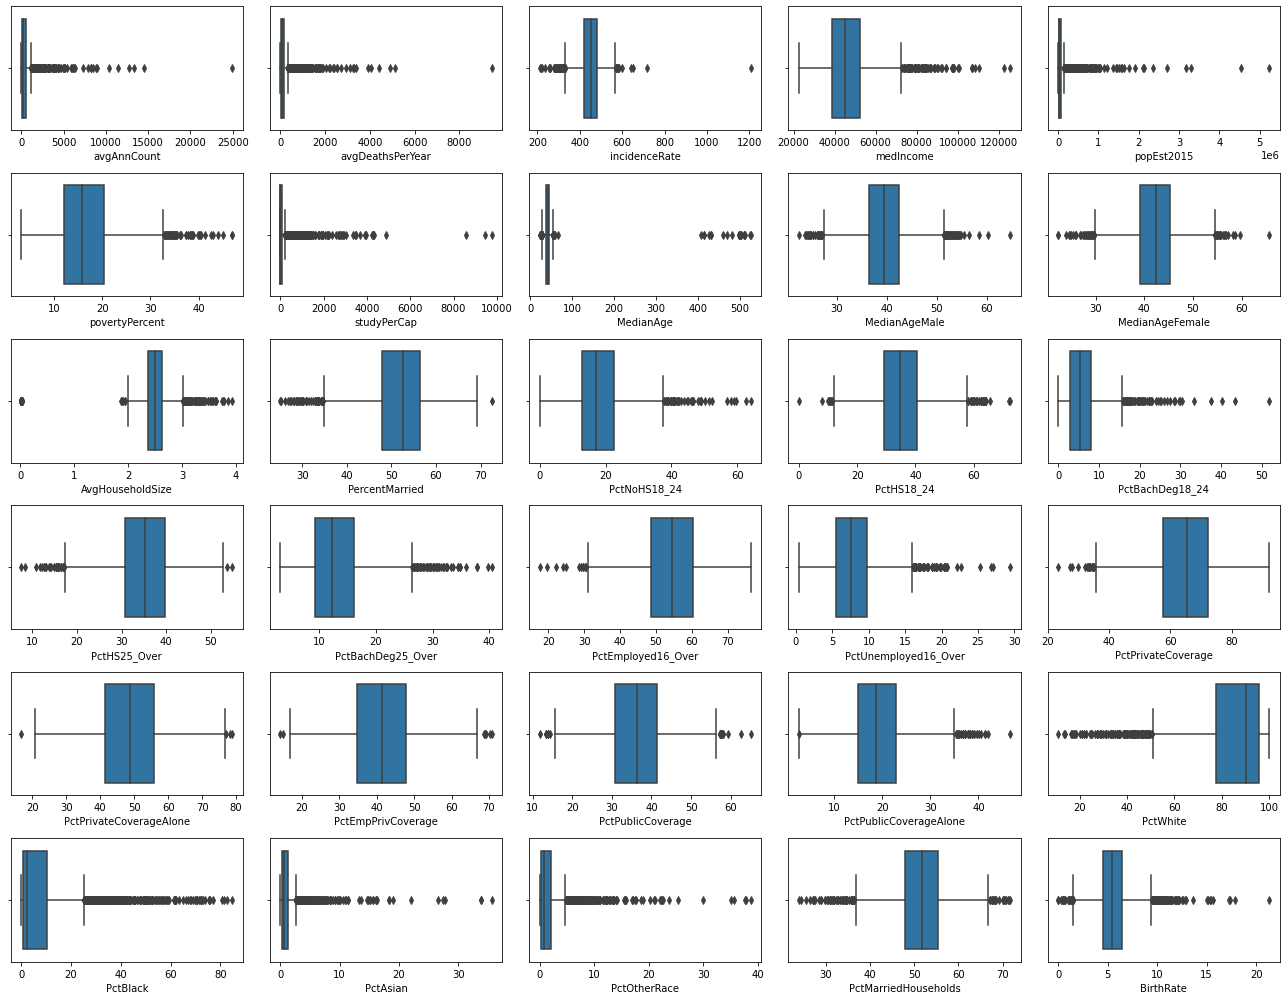

In [20]:
fig, axes = plt.subplots(6, 5, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(cancer_train_data.columns[:-1]):
  plot = sns.boxplot(data=cancer_train_data, x=c, ax=axes[i])
plt.tight_layout()

- As we suspected from the scatter plot, there are some outliers in these columnss
    - avgAnnCount, avgDeathPerYear, IncidentRate, MedianAge,studyPerCap 

### Separate the Input and Target Features of the data

In [21]:
X=cancer_train_data.drop('TARGET_deathRate',axis=1) #dropping the target variable 
y=cancer_train_data['TARGET_deathRate'] # target variable

### Split the data into Train and Test Sets

In [22]:
# splitting the train and test dataset with the test_size of 0.1 and random_state=21
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.1,random_state=21)

## Task 2
### Performing Data Preparation Steps

In [23]:
#filling the null values in these respective columns with the mean values
X_train['PctPrivateCoverageAlone'].fillna(X_train['PctPrivateCoverageAlone'].mean(),inplace=True)
X_train['PctEmployed16_Over'].fillna(X_train['PctEmployed16_Over'].mean(),inplace=True)
X_test['PctPrivateCoverageAlone'].fillna(X_test['PctPrivateCoverageAlone'].mean(),inplace=True)
X_test['PctEmployed16_Over'].fillna(X_test['PctEmployed16_Over'].mean(),inplace=True)

In [24]:
X_train.isnull().sum() #no null values in all the columns

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [25]:
# finding all the outliers in all the columns and replacing the same with the upper_whisker value of each column
for i in X_train.select_dtypes(include=['float64','int64']):
    q1 = X_train[i].quantile(0.25)                 
    q3 = X_train[i].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - whisker_width*iqr
    upper_whisker = q3 + whisker_width*iqr
    outlier_train = X_train[(X_train[i] < q1 - whisker_width*iqr) | (X_train[i] > q3 + whisker_width*iqr)]
    X_train.loc[X_train[i]>upper_whisker,i] = upper_whisker


In [26]:
# finding all the outliers in all the columns and replacing the same with the upper_whisker value of each column
for i in X_test.select_dtypes(include=['float64','int64']):
    q1 = X_test[i].quantile(0.25)                 
    q3 = X_test[i].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - whisker_width*iqr
    upper_whisker = q3 + whisker_width*iqr
    outlier_test = X_test[(X_test[i] < q1 - whisker_width*iqr) | (X_test[i] > q3 + whisker_width*iqr)]
    X_test.loc[X_test[i]>upper_whisker,i] = upper_whisker

 

In [27]:
# finding all the outliers in all the columns and replacing the same with the upper_whisker value of each column
for i in cancer_test_data.select_dtypes(include=['float64','int64']):
    q1 = cancer_test_data[i].quantile(0.25)                 
    q3 = cancer_test_data[i].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - whisker_width*iqr
    upper_whisker = q3 + whisker_width*iqr
    outlier_test = cancer_test_data[(cancer_test_data[i] < q1 - whisker_width*iqr) | (cancer_test_data[i] > q3 + whisker_width*iqr)]
    cancer_test_data.loc[cancer_test_data[i]>upper_whisker,i] = upper_whisker

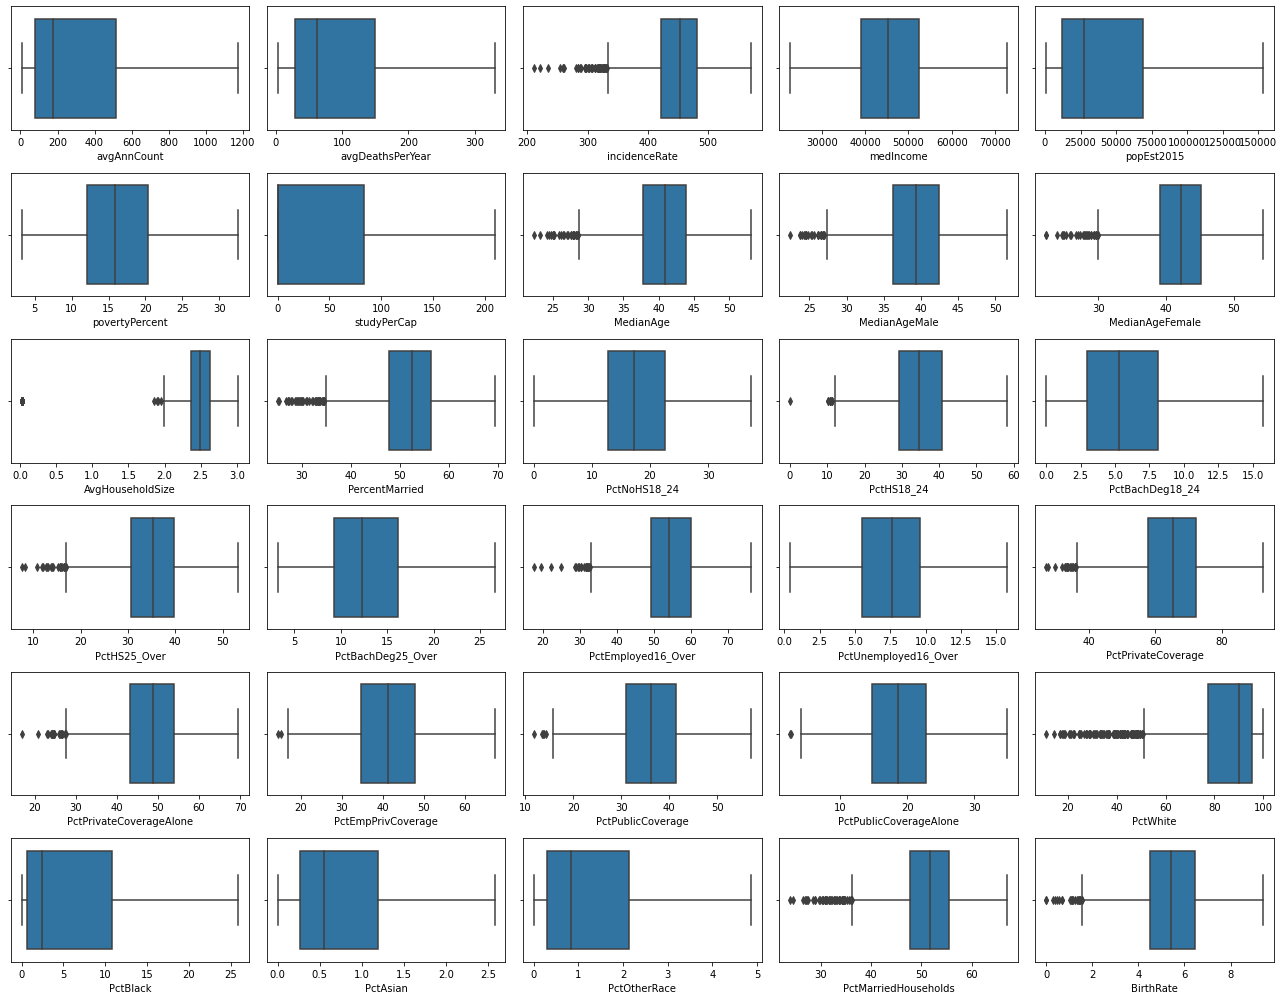

In [28]:
#there are no outliers in the data now
fig, axes = plt.subplots(6, 5, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(X_train.columns):
  plot = sns.boxplot(data=X_train, x=c, ax=axes[i])
plt.tight_layout()

## Task 3
### Building Machine Learning Model 
#### i)Linear Regression Model

In [29]:
#Building the baseline model using the linearRegression algorithm
lr=LinearRegression()
lr.fit(X_train,Y_train) #training the model
prediction=lr.predict(X_test) #predicting the target variable for the unseen data


### Model Evaluation

In [30]:
#evaluating the model with the following metrics
mse=mean_squared_error(prediction,Y_test)          #mean squared error
mae=mean_absolute_error(prediction,Y_test)         #mean absolute error
rmse=np.sqrt(mean_squared_error(prediction,Y_test))#root mean squared error

In [31]:
#creating the dataframe with these error metrics values
lrmodel=pd.DataFrame({"mse":mse,"mae":mae,"rmse":rmse},index=['LinearRegression'])

### Other Models

#### ii) Decision Tree Model

In [32]:
dt=DecisionTreeRegressor() #decisiontree regression algorithm with the default parameters
dt.fit(X_train,Y_train)
prediction=dt.predict(X_test)

In [33]:
mse=mean_squared_error(prediction,Y_test)
mae=mean_absolute_error(prediction,Y_test)
rmse=np.sqrt(mean_squared_error(prediction,Y_test))

In [34]:
dtmodel=pd.DataFrame({"mse":mse,"mae":mae,"rmse":rmse},index=['DecisionTree'])


#### iii) RandomForest Model

In [35]:
rf=RandomForestRegressor() #Random Forest Regression algorithm with the default parameters
rf.fit(X_train,Y_train)
prediction=rf.predict(X_test)

In [36]:
mse=mean_squared_error(prediction,Y_test)
mae=mean_absolute_error(prediction,Y_test)
rmse=np.sqrt(mean_squared_error(prediction,Y_test))

In [37]:
rfmodel=pd.DataFrame({"mse":mse,"mae":mae,"rmse":rmse},index=['RandomForest'])


#### iv) XGBoost Model

In [38]:
xg=xgb.XGBRegressor() #Xgboost regression algorithm with the default parameters
xg.fit(X_train,Y_train)
prediction=xg.predict(X_test)

In [39]:
mse=mean_squared_error(prediction,Y_test)
mae=mean_absolute_error(prediction,Y_test)
rmse=np.sqrt(mean_squared_error(prediction,Y_test))

In [40]:
xgmodel=pd.DataFrame({"mse":mse,"mae":mae,"rmse":rmse},index=['XGBoost'])


In [41]:
models = pd.concat([lrmodel, dtmodel,rfmodel,xgmodel]) 


### SUMMARY OF THE ABOVE MODELS

In [42]:
models

,mse,mae,rmse
LinearRegression,333.742711,13.733293,18.268626
DecisionTree,674.747773,19.959825,25.975908
RandomForest,319.902666,13.420777,17.885823
XGBoost,302.381945,12.358850,17.389133


##### From all the above models, XGBRegressor performs well by giving the less mse value

In [43]:
X_train.shape

(2056, 30)

## Task 4
### Hyperparameter Tuning

- From the above models, XGBRegressor gave the less mean squared error value.
- So, choosing this model to fine-tune further to achieve even more lesser mse value.
- Choosing the main three parameters of XGBoost Regressor:
    - n_estimators
    - max_depth
    - learning_rate
- First, finding the best parameters value using RandomizedSearchCV as it takes less time to search and give the best values. Using that threshold values, creating another set of parameters and finding out the best from that using GridSearchCV

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.1,random_state=21)

In [45]:
xgb1 = xgb.XGBRegressor()
parameters = {
    'n_estimators': [80, 90, 100, 125, 150,200,1000,2000,2050],
    'max_depth': [2,3,4,5,8,16,None],
    'learning_rate': [0.15, 0.1, 0.3, 0.5]
}
cv = RandomizedSearchCV(xgb1, parameters, cv=5)
cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

In [46]:
cv.best_params_

{'n_estimators': 2000, 'max_depth': 2, 'learning_rate': 0.1}

In [47]:
xgb2 = xgb.XGBRegressor()
parameters = {
    'n_estimators': [1000,3000,3500],
    'max_depth': [2,3,None],
    'learning_rate': [0.15,0.155,0.159]
}
cv = GridSearchCV(xgb2, parameters, cv=5)
cv.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [48]:
cv.best_params_

{'learning_rate': 0.159, 'max_depth': 2, 'n_estimators': 3500}

- Building and fitting the model with the best parameters values {'learning_rate': 0.159, 'max_depth': 2, 'n_estimators': 3500} provided by GridsearchCV

In [49]:
xg=xgb.XGBRegressor(n_estimators=3500,max_depth=2,learning_rate=0.159,n_jobs=-1,random_state=42)
xg.fit(X_train,Y_train)
prediction=xg.predict(X_test)

In [50]:
mse=mean_squared_error(prediction,Y_test)
mae=mean_absolute_error(prediction,Y_test)
rmse=np.sqrt(mean_squared_error(prediction,Y_test))

In [51]:
xgmodel_after_tuning=pd.DataFrame({"mse":mse,"mae":mae,"rmse":rmse},index=['Tuned_XGBoost'])


In [52]:
models = pd.concat([lrmodel, dtmodel,rfmodel,xgmodel,xgmodel_after_tuning]) 


In [53]:
models # as we can see that, this model has improved further by tuning it

,mse,mae,rmse
LinearRegression,333.742711,13.733293,18.268626
DecisionTree,674.747773,19.959825,25.975908
RandomForest,319.902666,13.420777,17.885823
XGBoost,302.381945,12.358850,17.389133
Tuned_XGBoost,184.349392,10.025428,13.577533


## Task 5
### Feature Selection - XGBoost
- Selecting only the important features to improve the model performance further

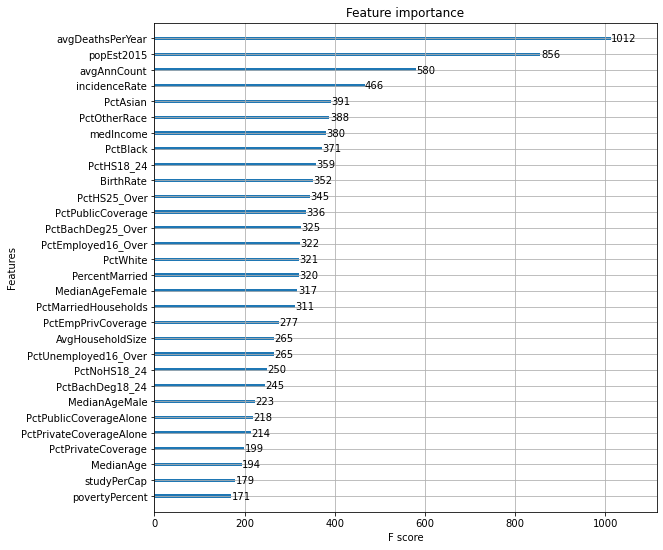

In [54]:
f,ax=plt.subplots(figsize=(9,9));
#it shows the feature score value from the xgboost model
plot_importance(xg,ax=ax);
plt.show()

In [55]:
#to see the feature and its importance value
feat_labels=X_train.columns.to_list()
for feature in zip(feat_labels, xg.feature_importances_):
    print(feature)

('avgAnnCount', 0.039960656)
('avgDeathsPerYear', 0.036624204)
('incidenceRate', 0.14714977)
('medIncome', 0.029402256)
('popEst2015', 0.027231822)
('povertyPercent', 0.118043534)
('studyPerCap', 0.009669651)
('MedianAge', 0.010683341)
('MedianAgeMale', 0.017930266)
('MedianAgeFemale', 0.014335778)
('AvgHouseholdSize', 0.017753312)
('PercentMarried', 0.011478639)
('PctNoHS18_24', 0.006898949)
('PctHS18_24', 0.020274386)
('PctBachDeg18_24', 0.010218443)
('PctHS25_Over', 0.07779664)
('PctBachDeg25_Over', 0.13535333)
('PctEmployed16_Over', 0.018948607)
('PctUnemployed16_Over', 0.035353456)
('PctPrivateCoverage', 0.019427085)
('PctPrivateCoverageAlone', 0.012381046)
('PctEmpPrivCoverage', 0.007711214)
('PctPublicCoverage', 0.00944587)
('PctPublicCoverageAlone', 0.07394333)
('PctWhite', 0.013288226)
('PctBlack', 0.02077157)
('PctAsian', 0.009071642)
('PctOtherRace', 0.023393268)
('PctMarriedHouseholds', 0.0161)
('BirthRate', 0.009359677)


In [56]:
#selecting only the features which is greater than or equal to that threshold value
selection = SelectFromModel(xg,threshold=0.0134)
selection.fit(X_train, Y_train)

# Transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test) 

# train model
selection_model = xgb.XGBRegressor(n_estimators=3500,max_depth=2,learning_rate=0.15,n_jobs=-1,random_state=21)
selection_model.fit(select_X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3500, n_jobs=-1, num_parallel_tree=1, random_state=21,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
final_features=[]
for feature_list_index in selection.get_support(indices=True):
    final_features.append(feat_labels[feature_list_index])

In [58]:
#final features after the transformation
#There are around 19 features
for feature in zip(final_features, selection_model.feature_importances_):
    print(feature)

('avgAnnCount', 0.04024327)
('avgDeathsPerYear', 0.064540416)
('incidenceRate', 0.1667563)
('medIncome', 0.029005151)
('popEst2015', 0.033272065)
('povertyPercent', 0.09873789)
('MedianAgeMale', 0.014754562)
('MedianAgeFemale', 0.019515403)
('AvgHouseholdSize', 0.024728118)
('PctHS18_24', 0.026723312)
('PctHS25_Over', 0.082360774)
('PctBachDeg25_Over', 0.15777016)
('PctEmployed16_Over', 0.023606276)
('PctUnemployed16_Over', 0.043809097)
('PctPrivateCoverage', 0.021405391)
('PctPublicCoverageAlone', 0.07494538)
('PctBlack', 0.029907634)
('PctOtherRace', 0.024149379)
('PctMarriedHouseholds', 0.023769466)


In [59]:
prediction=selection_model.predict(select_X_test) #predicting the model with the selected features
mean_squared_error(prediction,Y_test) 

182.06999487922445

In [60]:
mse=mean_squared_error(prediction,Y_test)
mae=mean_absolute_error(prediction,Y_test)
rmse=np.sqrt(mean_squared_error(prediction,Y_test))

In [61]:
xgmodel_after_feature_selected=pd.DataFrame({"mse":mse,"mae":mae,"rmse":rmse},index=['Feature_Selected_XGBoost'])

In [62]:
models = pd.concat([lrmodel, dtmodel,rfmodel,xgmodel,xgmodel_after_tuning,xgmodel_after_feature_selected]) 

In [63]:
models

,mse,mae,rmse
LinearRegression,333.742711,13.733293,18.268626
DecisionTree,674.747773,19.959825,25.975908
RandomForest,319.902666,13.420777,17.885823
XGBoost,302.381945,12.358850,17.389133
Tuned_XGBoost,184.349392,10.025428,13.577533
Feature_Selected_XGBoost,182.069995,9.978993,13.493331


- We can see that the model has improved further with the less mse value
- Load the test data (name it as test_data). You can load the data using the below command.

    - test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')
- Loading the data, filling the missing values and replacing the outliers with the upper whisker values are done in the previous steps in the respective tasks

In [64]:
#transform the test features and predict the target
select_test = selection.transform(cancer_test_data)
pred_test=selection_model.predict(select_test)

In [65]:
#creating the dataframe with the predicted value of the test dataset 
df=pd.DataFrame({"prediction":pred_test})
df.to_csv("xg5.csv",index=False) #converting the dataframe to csv for submission


## Conclusion:
- XGBoost model performed better than LinearRegression, Decisiontree and Randomforest model.
- Decisiontree Regressor gave the highest mse compare to all the other models and showed the poor performance.
- It is clearly observable that how the mse value decresed from the baseline XGBoost model to the tunedXGBoost model and further reduced the mse value with the featureselected XGBoost model.
- We can see that most of the selected features by the XGBoost model are positively or negatively correlated with the target variable as we already inferred from the heatmap and scatterplot.
- Data standardization reduced the model performance. So here data is neither standardized nor normalised. Used the data as it is.
- Feature selection by Boruta didn't work so well with this dataset.
- Also, random_state plays the major role.
- Replacing the outliers with the median value might improve the model further. You can try it out.
- Try changing the threshold value for the feature selection in the XGBoost model and see if the model is improving further.
- Also, you can try with the Tuned RandomForest model or Tuned DecisionTree model to see how the mse value changes.
